# From Network (NetworkX) to Persistent Homology (PH) - Custom Plotting

<p>The barcode plotting from GUDHI does not allow sub-plotting and other configurations. This notebook presents a custom plotting function.</p>
<p>Unfortunately, I over-complicate the code. I am sure there is an easier and faster way of doing what the "plotBarcode(bc)" function does. However, for now, it will suffice. Later, I may refactor this code and remove the use of pandas. Any contribution to the code is welcome</p>

**Rodrigo Henrique Ramos: rodrigohenrique.ramos@gmail.com**

In [1]:
import numpy as np
import pandas as pd
import gudhi as gd  
import matplotlib.pyplot as plt
from sklearn import manifold
import networkx as nx
from matplotlib.patches import Polygon

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Create 4 samples (toys) networks with NetworkX

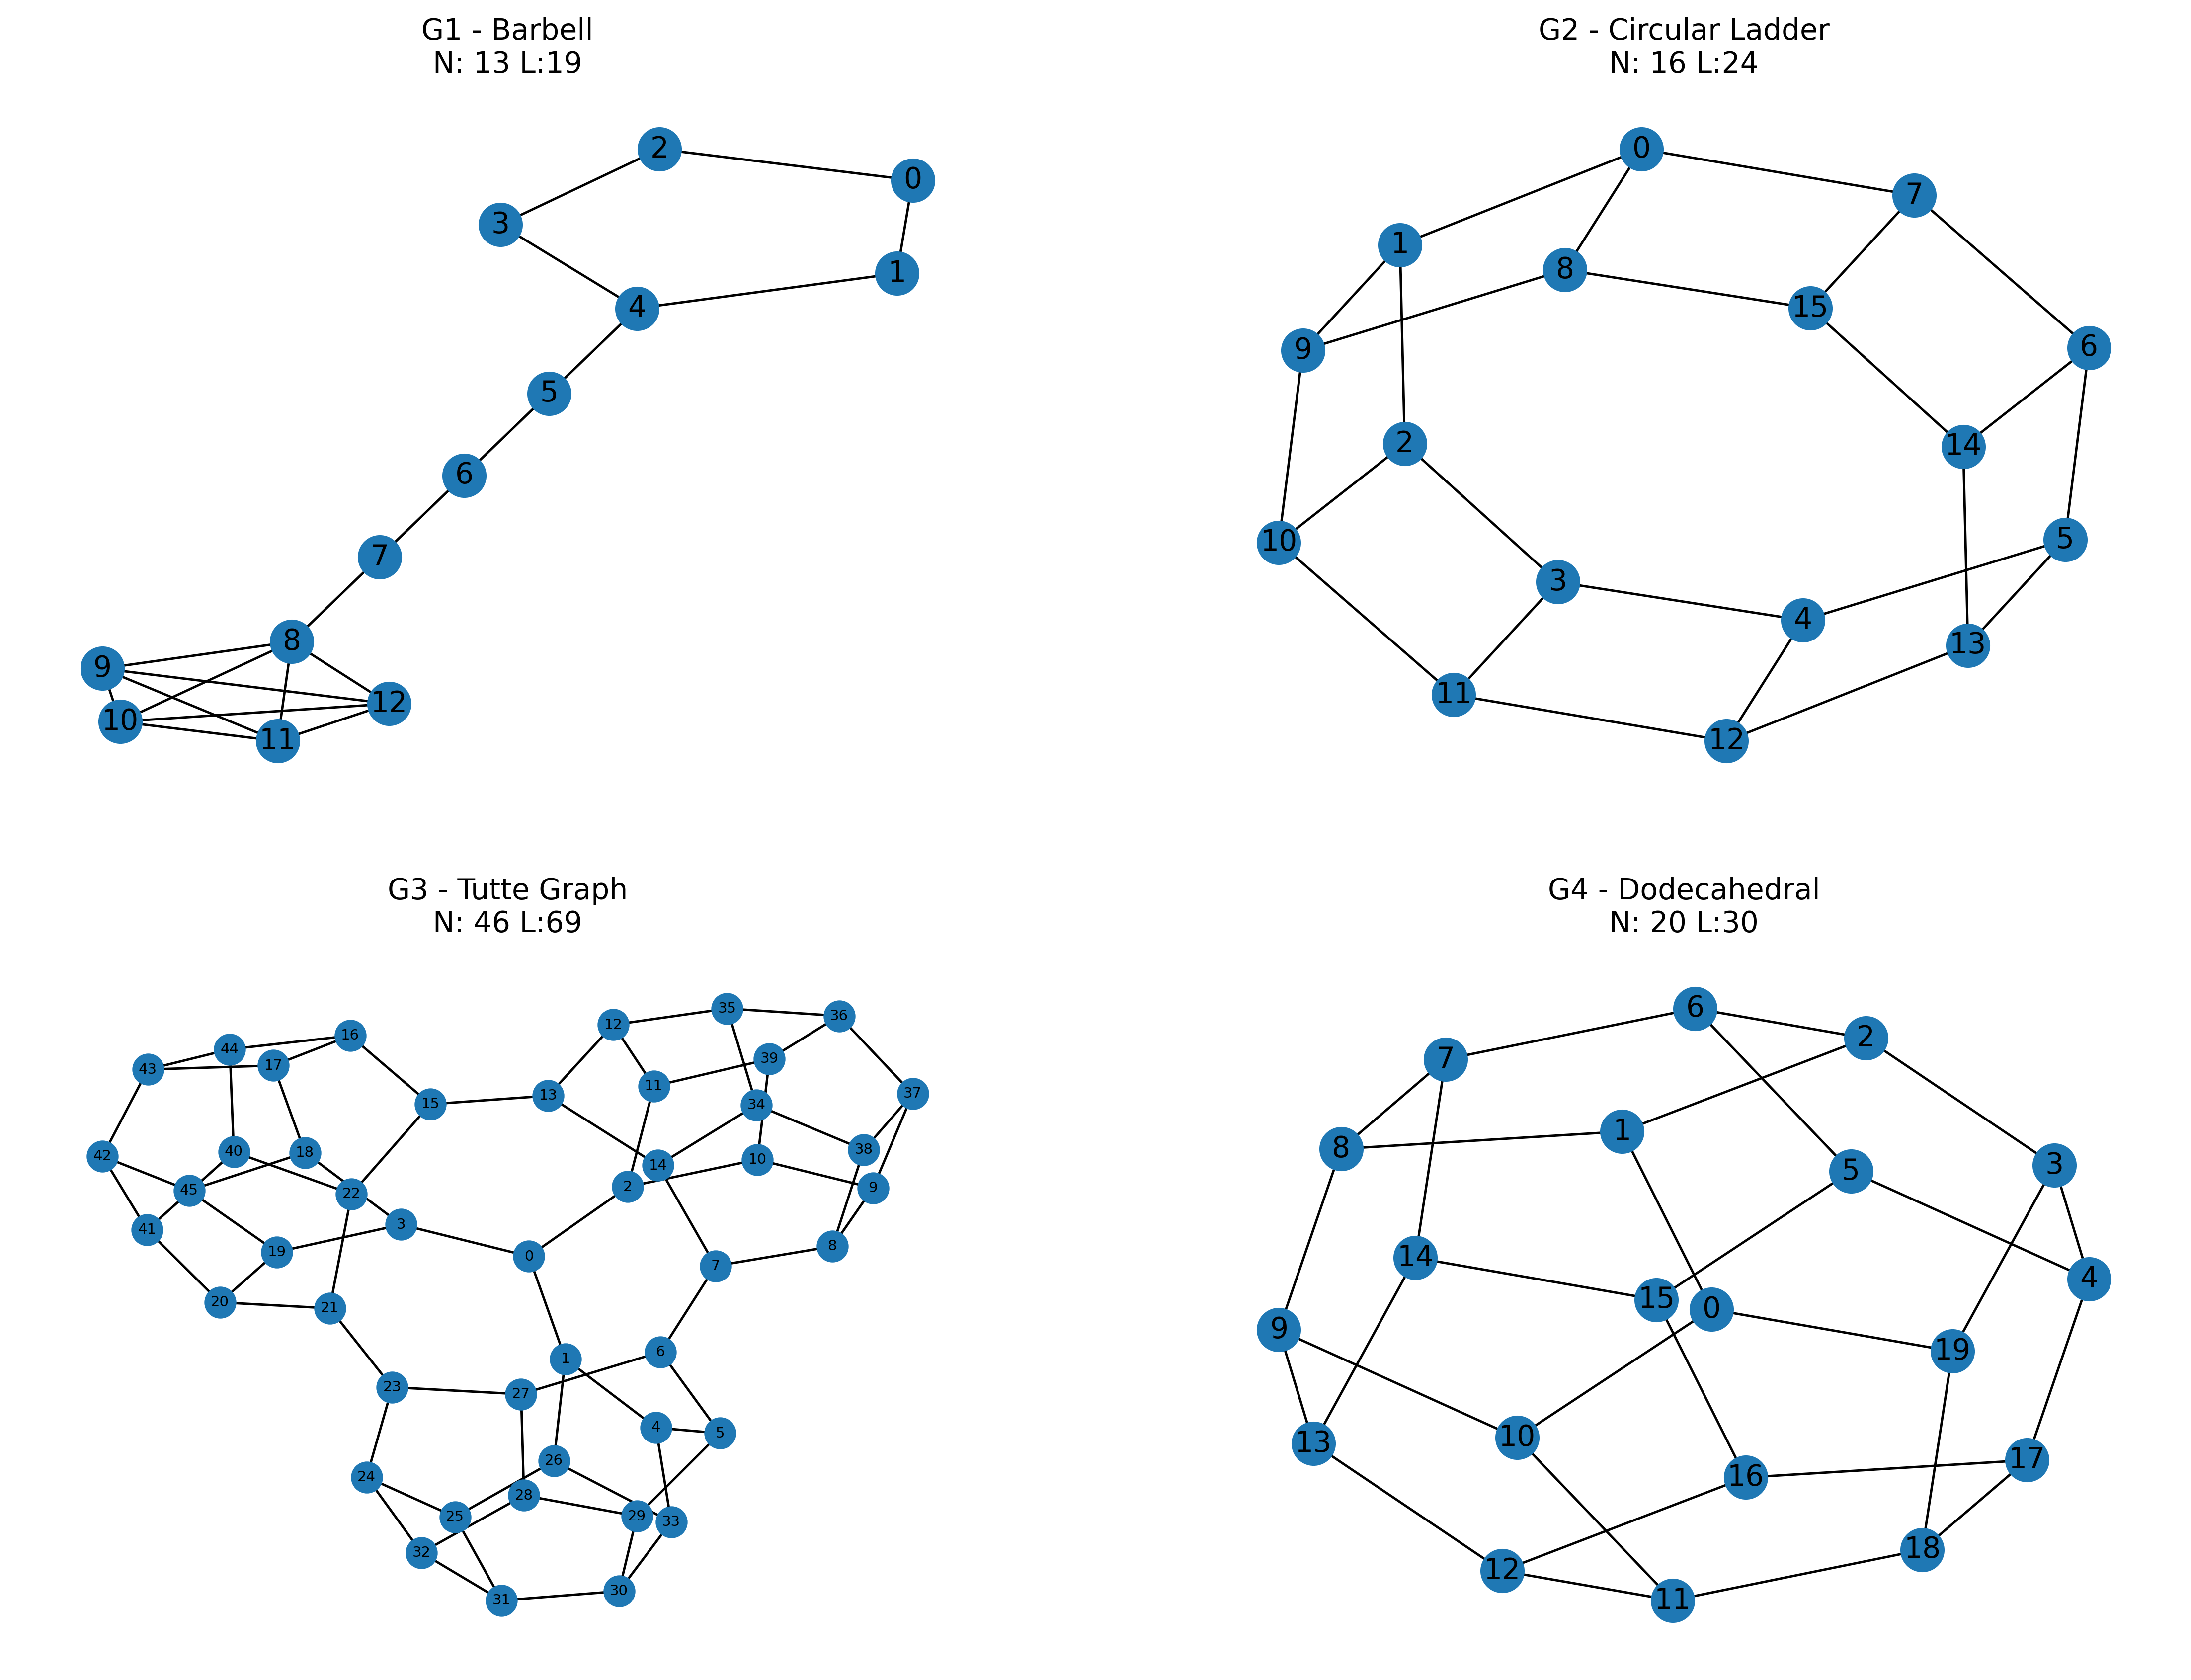

In [2]:
G1 = nx.barbell_graph(5,3)
G1.remove_edges_from([(2,4),(3,1),(1,2),(3,0),(0,4)])
G1.name='G1 - Barbell'
plt.figure(figsize=(16,12),dpi=350)
plt.subplot(2,2,1)
plt.title(G1.name+'\nN: '+str(G1.number_of_nodes())+' L:'+str(G1.number_of_edges()))
nx.draw_kamada_kawai(G1,with_labels=True)

G2 = nx.generators.circular_ladder_graph(8)
G2.name='G2 - Circular Ladder'
plt.subplot(2,2,2)
plt.title(G2.name+'\nN: '+str(G2.number_of_nodes())+' L:'+str(G2.number_of_edges()))
nx.draw_kamada_kawai(G2,with_labels=True)


G3 = nx.tutte_graph()
G3.name='G3 - Tutte Graph'
plt.subplot(2,2,3)
nx.draw_kamada_kawai(G3,with_labels=True,node_size=150,font_size=6)
plt.title(G3.name+'\nN: '+str(G3.number_of_nodes())+' L:'+str(G3.number_of_edges()))

G4 = nx.generators.dodecahedral_graph()
G4.name='G4 - Dodecahedral'
plt.subplot(2,2,4)
nx.draw_kamada_kawai(G4,with_labels=True)
plt.title(G4.name+'\nN: '+str(G4.number_of_nodes())+' L:'+str(G4.number_of_edges()))

plt.show()

# Calculate the Distance Matrix for these networks

In [3]:
%%time
networks={}
distanceMatrixs={}
for G in [G1,G2,G3,G4]:
    distanceMatrixs[G.name]=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
    networks[G.name]=G

CPU times: total: 15.6 ms
Wall time: 16.7 ms


# Original plotting from GUDHI

usetex mode requires TeX.


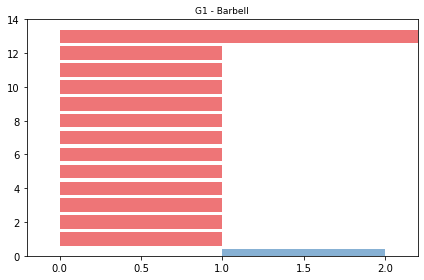

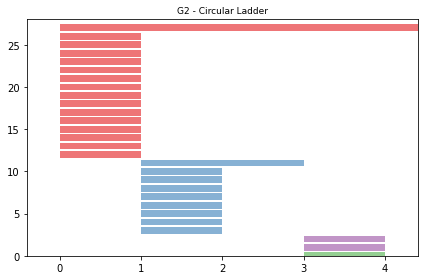

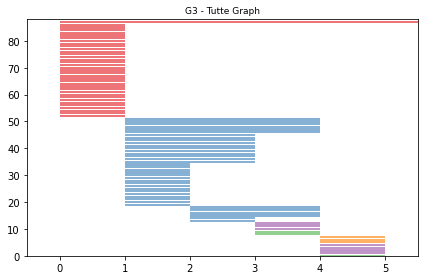

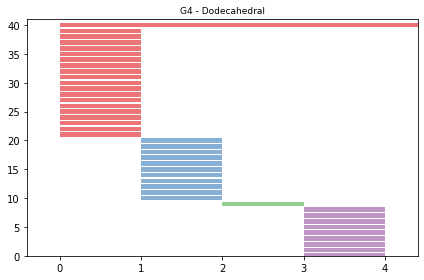

CPU times: total: 29.3 s
Wall time: 29.4 s


In [4]:
%%time
dim=5 

simplexTrees={}
barCodes={}
for G in [G1,G2,G3,G4]:
    skeleton = gd.RipsComplex(
        distance_matrix = distanceMatrixs[G.name].values
    ) 
    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = dim)    
    BarCode = Rips_simplex_tree.persistence()
    gd.plot_persistence_barcode(BarCode);       
    plt.title(G.name,fontsize=9)
    plt.tight_layout()
    plt.show()

# CUSTOM PLOTTING 
In addition to the subplot, it is also possible to change the image quality with figsize and dpi

In [5]:
def plotBarcode(bc):
    data=[]
    for dim, timeLived in bc:
        data.append((dim,timeLived,timeLived[1]-timeLived[0],timeLived[0]))
    df=pd.DataFrame(data,columns=['Dim','BirthDeath','TimeLived','Birth'])
    df=df.sort_values(by=['BirthDeath','TimeLived'],ascending=False)
    colorsByDimension={0:'tab:red',1:'tab:blue',2:'tab:green',3:'tab:purple',4:'tab:orange'}
    i=0
    groups=list(df.groupby(by=['Dim']))
    for dim,df in groups:
        for _,df2 in df.groupby(by=['Birth']):
            timeLived=list(df2['BirthDeath'])
            for birth,death in timeLived:
                plt.broken_barh(xranges=[(birth, death-birth)], yrange=(len(bc)-i, 0.5),color=colorsByDimension[dim])
                i+=1

    #add the continuos line 
    xMin,xMax=plt.xlim()
    plt.broken_barh(xranges=[(0,xMax)], yrange=(i, 0.5),color=colorsByDimension[0])
    plt.xlim(xMin,xMax)

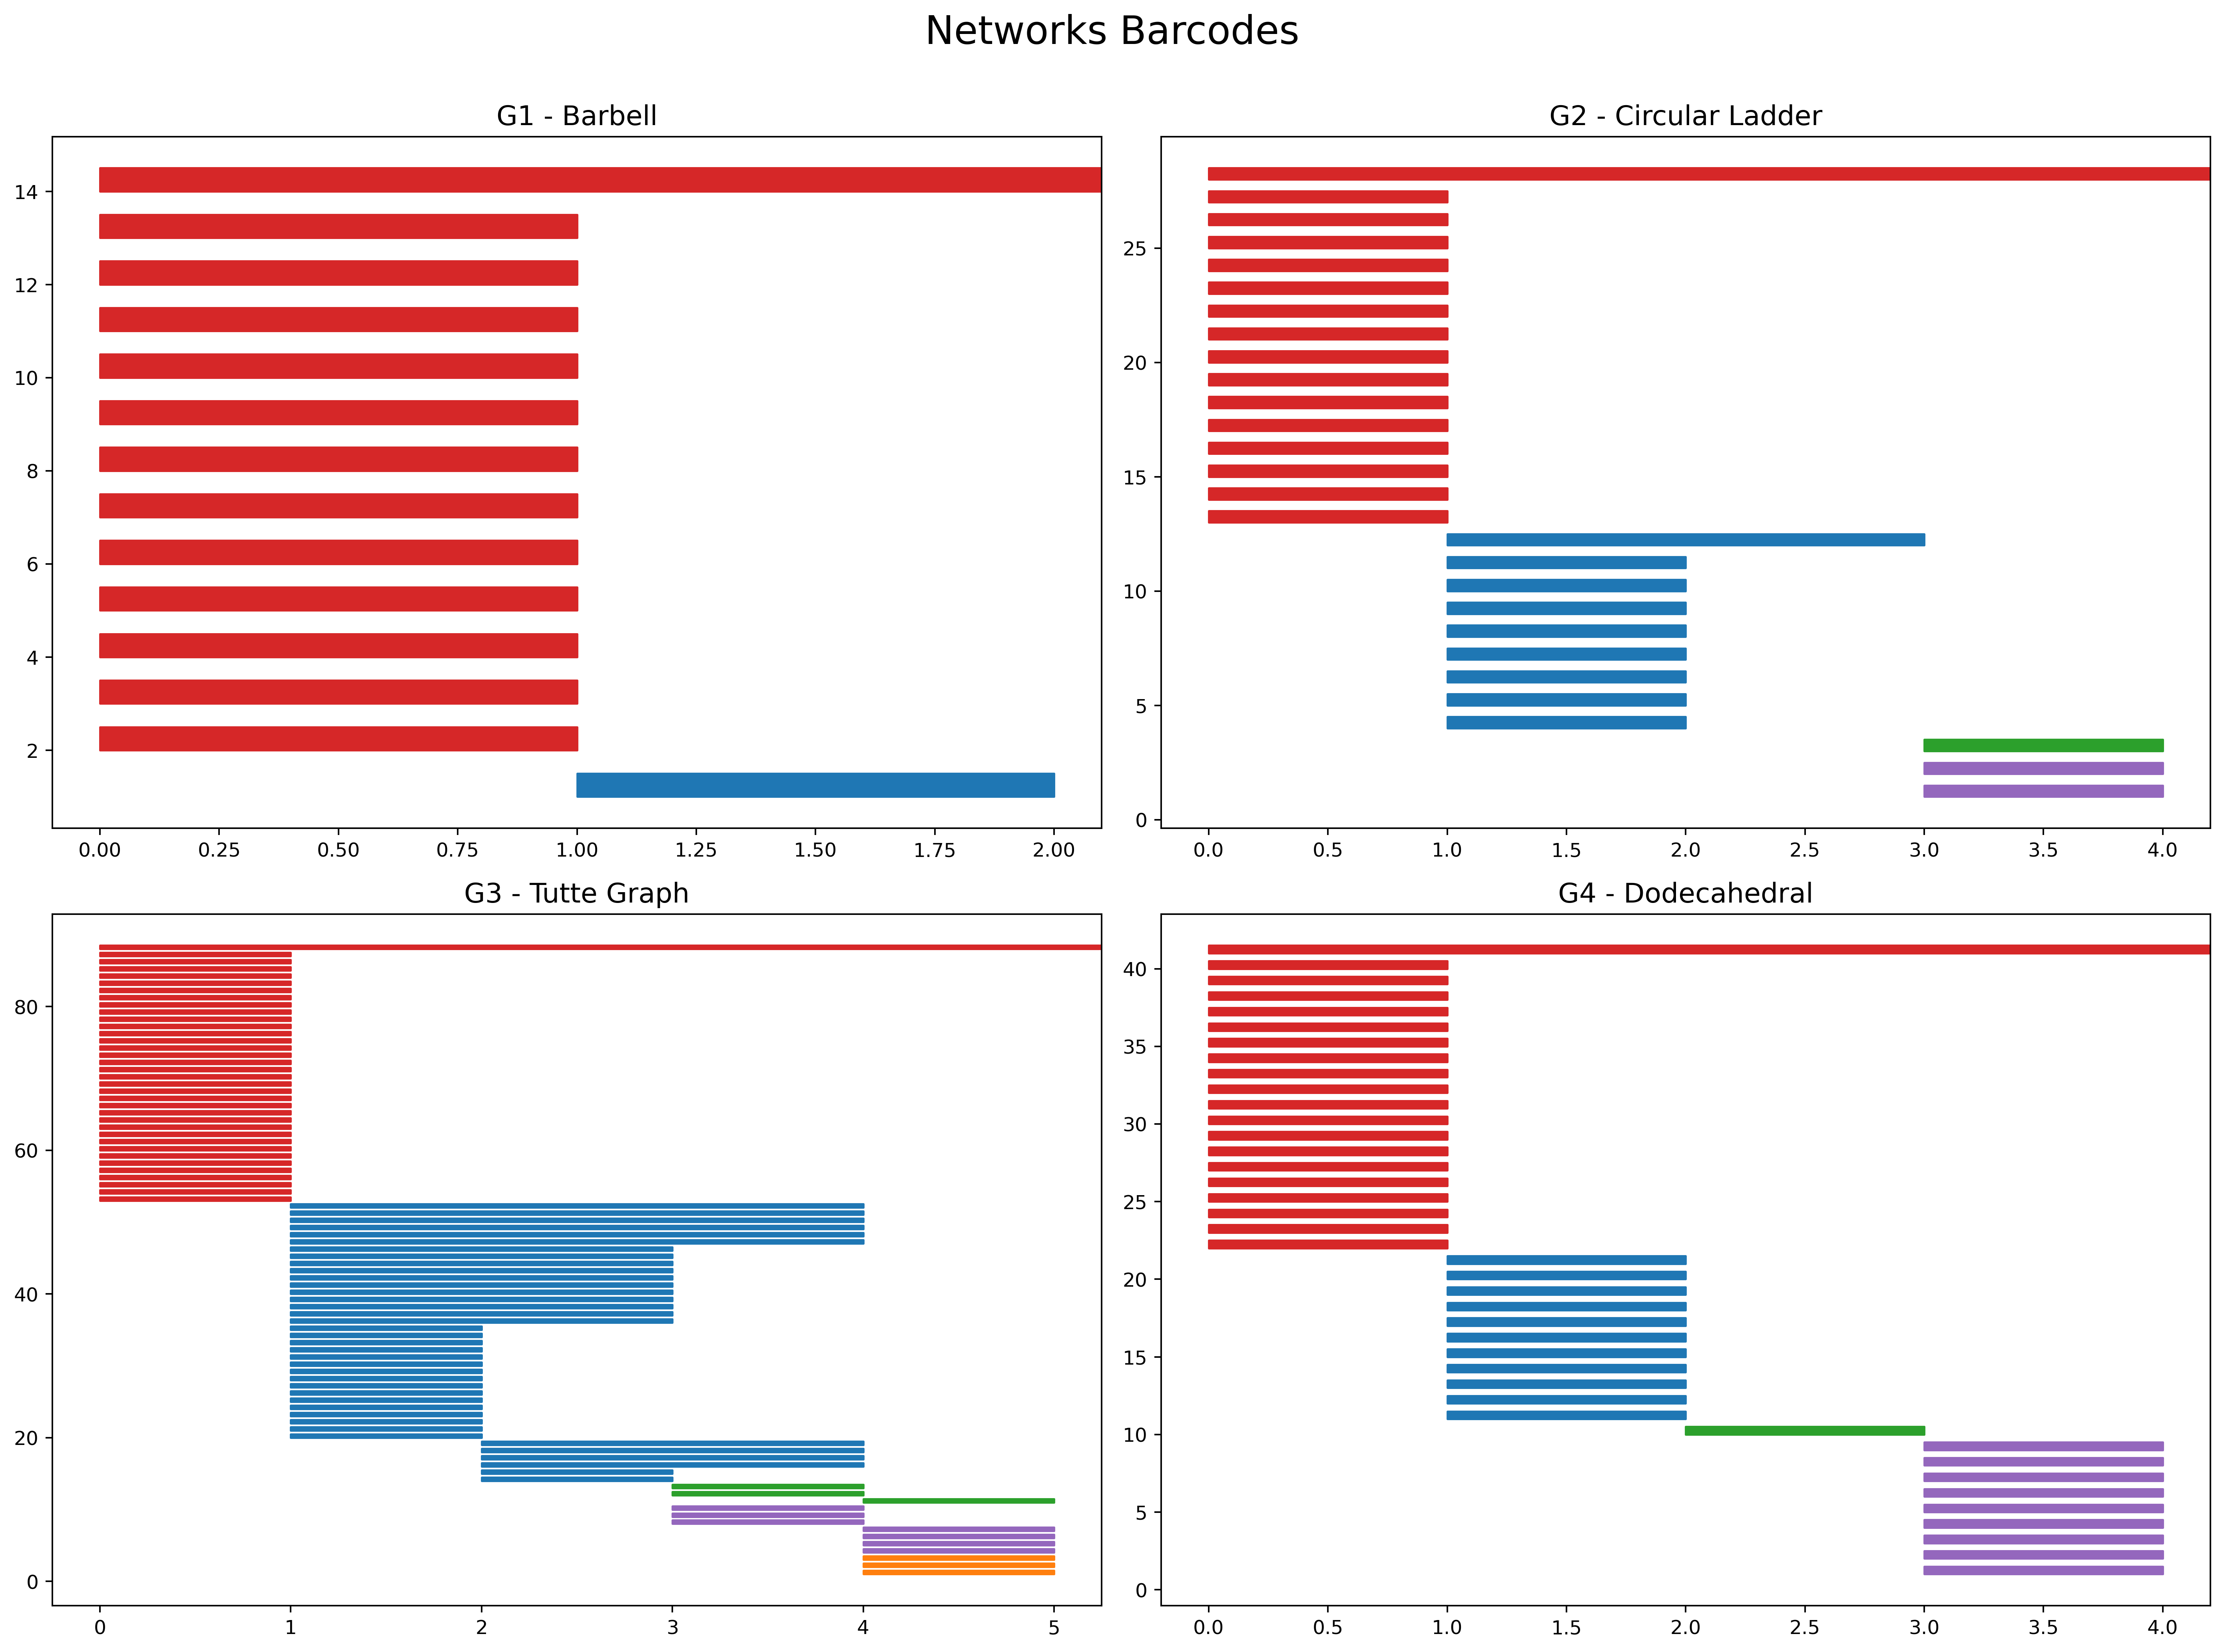

CPU times: total: 31 s
Wall time: 31 s


In [6]:
%%time
dim=5 

simplexTrees={}
barCodes={}
plt.figure(figsize=(16,12),dpi=350)
barcodes=[]
i=1
for G in [G1,G2,G3,G4]:
    skeleton = gd.RipsComplex(
        distance_matrix = distanceMatrixs[G.name].values
    ) 
    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = dim)    
    BarCode = Rips_simplex_tree.persistence()
    barcodes.append(BarCode)
    #Plotting
    plt.subplot(2,2,i)
    plotBarcode(BarCode)        
    plt.title(G.name,fontsize=14)
    plt.tight_layout()
    i+=1
plt.suptitle('Networks Barcodes\n',fontsize=20)
plt.tight_layout()
plt.show()